# Parte 3: Convergencia
Al igual que en la parte 2, es necesario importar las funciones auxiliares que hemos implementado para simular las muestras de variables aleatorias:

In [1]:
import sys; sys.path.insert(0, '..')
from simulador import *

Luego obtenemos cuatro muestras con distribucion binomial de tamaño 100 con probabilidad p igual a 0.4, pero cada una con 10, 20, 50 y 100 experimentos Bernoulli, que se denotaran como `bin10`, `bin20`, `bin50` y `bin100` respectivamente:

In [2]:
bin10 = binomial(100, 10, 0.4)
bin20 = binomial(100, 20, 0.4)
bin50 = binomial(100, 50, 0.4)
bin100 = binomial(100, 100, 0.4)

Ahora, procedemos a graficar los histogramas correspondientes a cada muestra de datos obtenida.

Para una muestra binomial con 10 experimentos Bernoulli, probabilidad 0.4 y con 100 repeticiones, el histograma es el siguiente:

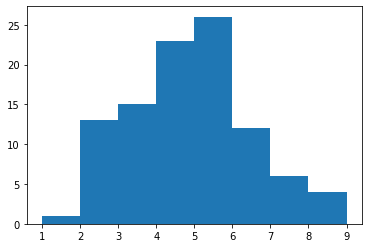

In [3]:
%matplotlib inline
from graficas import histograma
histograma(bin10, [1])

Para una muestra binomial con 20 experimentos Bernoulli, probabilidad 0.4 y con 100 repeticiones, el histograma es el siguiente:

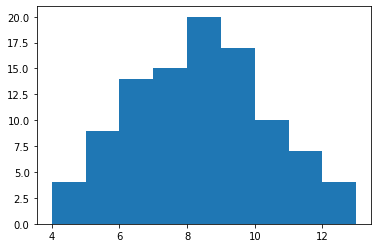

In [4]:
histograma(bin20, [1])

Para una muestra binomial con 50 experimentos Bernoulli, probabilidad 0.4 y con 100 repeticiones, el histograma es el siguiente:

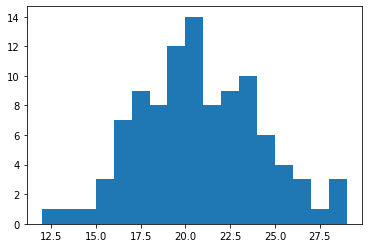

In [5]:
histograma(bin50, [1])

Para una muestra binomial con 100 experimentos Bernoulli, probabilidad 0.4 y con 100 repeticiones, el histograma es el siguiente:

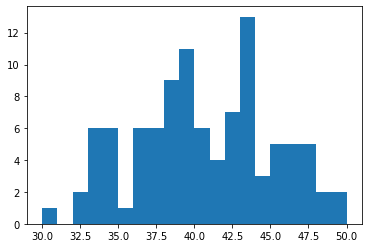

In [6]:
histograma(bin100, [1])

Lo que se puede observar es que a medida de que la cantidad de experimentos de la muestra crece, es decir n crece, la muestra empieza a tener la forma de una campana de Gauss y que se aproxima a una muestra de distribucion normal. Si se observa desde el primer histograma cuyo n es 10, hasta el ultimo cuyo n es 100, la forma de campana se hace mas notoria.

Ahora procedemos a graficar una muestra de tamaño 100 con probabilidad de éxito 0.4 para 200 experimentos Bernoulli. Calcularemos también su media y desviacion estandar muestrales.

Media muestral: 79.19 | Desviacion estandar muestral: 6.82


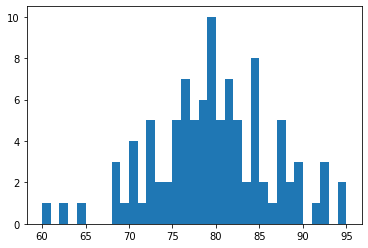

In [7]:
from analisis import media_muestral as mm
from analisis import desviacion_estandar_muestral as dem
bin200 = binomial(100, 200, 0.4)
bin200_mm = mm(bin200)
bin200_dem = dem(bin200)
print("Media muestral: %.2f | Desviacion estandar muestral: %.2f" % (bin200_mm, bin200_dem))
histograma(bin200, [1])

La forma de la campana caracteristica de una muestra con distribucion normal es mas marcada. Las 100 repeticiones del experimento hacen que haya resultados que se puedan promediar con el fin de obtener mayor precision en el mismo. Es asi que lo que se puede observar es que el promedio de todas estas repeticiones con probabilidad p (en este caso se tomo un p de valor 0.4) tienden o convergen al valor de la media (cuyo valor teorico es de 80 para esta muestra en particular).

Luego, con la media y desvío estandard muestrales estandarizaremos cada uno de los datos de la muestra y graficamos el histograma de la muestra estandarizada obtenida:

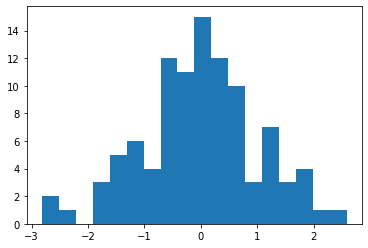

In [8]:
bin200_normalizada = [ (x - bin200_mm)/bin200_dem for x in bin200]
histograma(bin200_normalizada, [0.3])

Por ultimo, computamos las medias muestrales para cada una de las muestras anteriores y las escribimos en la siguiente tabla junto con su error relativo con respecto a la media de la distribución binomial de base:

In [9]:
from IPython.display import display, Markdown
display(Markdown('''
| Tamaño |  Media Muestral | Media Binomial | Err. Rel |
|--------|-----------------|----------------|----------|
| %d     |  %.2f           | %d             | %.3f     |
| %d     |  %.2f           | %d             | %.3f     |
| %d     |  %.2f           | %d             | %.3f     |
| %d     |  %.2f           | %d             | %.3f     |
| %d     |  %.2f           | %d             | %.3f     |  ''' % ( 10, mm(bin10),   4, abs(mm(bin10)/4 - 1),
        20, mm(bin20),   8, abs(mm(bin20)/8 - 1),
        50, mm(bin50),  20, abs(mm(bin50)/20 - 1),
       100, mm(bin100), 40, abs(mm(bin100)/40 - 1),
       200, mm(bin200), 80, abs(mm(bin200)/80 - 1))))


| Tamaño |  Media Muestral | Media Binomial | Err. Rel |
|--------|-----------------|----------------|----------|
| 10     |  4.43           | 4             | 0.107     |
| 20     |  7.90           | 8             | 0.012     |
| 50     |  20.31           | 20             | 0.015     |
| 100     |  40.14           | 40             | 0.004     |
| 200     |  79.19           | 80             | 0.010     |  

Repitiendo la experiencia muchas veces podemos observar que, si bien no de manera exacta dada la naturaleza probabilística de nuestro experimento, al aumentar la cantidad de experimentos Bernoulli de cada muestra y mantener el parámetros de probabilidad de éxito, el error relativo tiende a disminuir.